In [18]:
import pandas as pd

# Cargar el archivo CSV proporcionado por el usuario
try:
    df = pd.read_csv('/content/siniestros-viales-2021.csv')
    print("Archivo CSV cargado exitosamente.")
except FileNotFoundError:
    print("Error: El archivo '/content/siniestros-viales-2021.csv' no se encontró.")
    df = None
except Exception as e:
    print(f"Error al cargar o leer el archivo CSV: {e}")
    df = None

Archivo CSV cargado exitosamente.


### Limpieza:
Se inspeccionará el *DataFrame* para identificar y manejar valores nulos, y se asegurará de que los tipos de datos sean correctos.

In [19]:
if df is not None:
    print("Información inicial del DataFrame:")
    display(df.info())
    print("\nConteo de valores nulos por columna:")
    display(df.isnull().sum())
else:
    print("No se pudo cargar el DataFrame. No se realizará la limpieza.")

Información inicial del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10581 entries, 0 to 10580
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   anio_acci                10581 non-null  int64  
 1   nro_acci                 10581 non-null  int64  
 2   fecha                    10581 non-null  object 
 3   desc_dia                 10581 non-null  object 
 4   hora_aprox               9104 non-null   object 
 5   desc_ruta                2115 non-null   object 
 6   km                       10581 non-null  float64
 7   cant_participantes       10581 non-null  int64  
 8   desc_participante        10581 non-null  object 
 9   calle_avenida_km         10581 non-null  object 
 10  total                    10581 non-null  int64  
 11  heridos_leves            10581 non-null  int64  
 12  heridos_graves           10581 non-null  int64  
 13  heridos_gravisimos       10581 non-null  

None


Conteo de valores nulos por columna:


,0
anio_acci,0
nro_acci,0
fecha,0
desc_dia,0
hora_aprox,1477
desc_ruta,8466
km,0
cant_participantes,0
desc_participante,0
calle_avenida_km,0


### Transformación:
Se crearán nuevas columnas a partir de la fecha y hora para facilitar el análisis temporal. Por ejemplo, se extraerá el **día de la semana** y la **hora del día** para analizar patrones.

In [20]:
if df is not None:
    # Convertir la columna de fecha a datetime
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')

    # Combinar fecha y hora para crear una columna Datetime completa
    # Primero, manejar los valores nulos en 'hora_aprox' para evitar errores
    df['hora_aprox'] = df['hora_aprox'].fillna('00:00:00') # Reemplazar nulos con un valor por defecto

    # Crear una columna de cadena combinada de fecha y hora
    df['fecha_hora_str'] = df['fecha'].dt.strftime('%Y-%m-%d') + ' ' + df['hora_aprox']

    # Convertir la nueva columna combinada a datetime
    df['Datetime'] = pd.to_datetime(df['fecha_hora_str'], errors='coerce')

    # Eliminar la columna temporal 'fecha_hora_str'
    df = df.drop(columns=['fecha_hora_str'])

    # Crear nuevas columnas temporales
    df['Day_of_Week'] = df['Datetime'].dt.day_name()
    df['Hour_of_Day'] = df['Datetime'].dt.hour

    # Manejar valores nulos en la nueva columna Datetime si es necesario
    df.dropna(subset=['Datetime'], inplace=True)

    print("DataFrame después de la transformación:")
    display(df.info())
    display(df.head())
    display(df.isnull().sum())
else:
    print("No se pudo cargar el DataFrame. No se realizará la transformación.")

DataFrame después de la transformación:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10581 entries, 0 to 10580
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   anio_acci                10581 non-null  int64         
 1   nro_acci                 10581 non-null  int64         
 2   fecha                    10581 non-null  datetime64[ns]
 3   desc_dia                 10581 non-null  object        
 4   hora_aprox               10581 non-null  object        
 5   desc_ruta                2115 non-null   object        
 6   km                       10581 non-null  float64       
 7   cant_participantes       10581 non-null  int64         
 8   desc_participante        10581 non-null  object        
 9   calle_avenida_km         10581 non-null  object        
 10  total                    10581 non-null  int64         
 11  heridos_leves            10581 non-null  int64       

None

,anio_acci,nro_acci,fecha,desc_dia,hora_aprox,desc_ruta,km,cant_participantes,desc_participante,calle_avenida_km,...,desc_tipo_colision,desc_tipo_atropello,desc_tipo_hecho,desc_pres_calzada,desc_senializacion,desc_separacion_via,desc_restriccion,Datetime,Day_of_Week,Hour_of_Day
0,2021,1,2021-01-15,Viernes,18:40:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Centeno Y Constitución,...,S/D,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-15 18:40:00,Friday,18
1,2021,2,2021-01-13,Miercoles,13:10:00,NaN,0.0,2,"Moto/Ciclomotor,Moto/Ciclomotor",Vera Mujica Y Dr. Rivas,...,De alcance,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-13 13:10:00,Wednesday,13
2,2021,3,2021-01-14,Jueves,00:50:00,NaN,0.0,2,"Moto/Ciclomotor,Pickup/Utilitario",Av. Battle y Ordoñez Y Santiago,...,Lateral,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-14 00:50:00,Thursday,0
3,2021,4,2021-01-12,Martes,14:10:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Pje. Suriguez y Acha,...,Frontal,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-12 14:10:00,Tuesday,14
4,2021,5,2021-01-11,Lunes,18:00:00,NaN,0.0,2,"Peatón,Moto/Ciclomotor",Bv. Oroño,...,S/D,Peatón,Colisión,Ninguna,Vertical,Cordón divisorio,Sin restricción,2021-01-11 18:00:00,Monday,18


,0
anio_acci,0
nro_acci,0
fecha,0
desc_dia,0
hora_aprox,0
desc_ruta,8466
km,0
cant_participantes,0
desc_participante,0
calle_avenida_km,0


## Análisis Exploratorio (EDA) y Visualización

Esta fase es clave para responder a tus preguntas de investigación. Se crearán gráficos para visualizar los datos.

### Análisis Geográfico:
Se usará un **mapa de calor** de la ciudad para mostrar las áreas con mayor densidad de siniestros, identificando visualmente los "puntos calientes" de riesgo.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None and 'posicion_XY' in df.columns:
    # Limpiar y preparar datos de ubicación (asumiendo formato 'POINT (longitude latitude)')
    def extract_lat_lon(point_str):
        if isinstance(point_str, str) and point_str.startswith('POINT ('):
            coords = point_str[7:-1].split()
            if len(coords) == 2:
                try:
                    return float(coords[1]), float(coords[0]) # Latitud, Longitud
                except ValueError:
                    return None, None
        return None, None

    df[['Latitude', 'Longitude']] = df['posicion_XY'].apply(lambda x: pd.Series(extract_lat_lon(x)))

    # Eliminar filas con coordenadas nulas
    df_geo = df.dropna(subset=['Latitude', 'Longitude']).copy()

    if not df_geo.empty:
        print("Generando mapa de calor geográfico...")
        # Crear un mapa de calor geográfico (requiere instalación adicional como `folium` o `geopandas` para mapas interactivos)
        # Para un mapa de calor simple con matplotlib y seaborn, podemos usar un 2D histograma o kdeplot
        plt.figure(figsize=(10, 8))
        sns.kdeplot(data=df_geo, x='Longitude', y='Latitude', fill=True, cmap='Reds', levels=20)
        plt.title('Mapa de Calor de Siniestros Viales en Santa Fe')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.show()
    else:
        print("No hay datos de geolocalización válidos para generar el mapa de calor.")

elif df is None:
    print("No se pudo cargar el DataFrame. No se realizará el análisis geográfico.")
else:
    print("La columna 'posicion_XY' no se encontró en el DataFrame. No se realizará el análisis geográfico.")

No hay datos de geolocalización válidos para generar el mapa de calor.


### Análisis Temporal:
Se examinará la distribución de los siniestros por **día de la semana** y **hora del día** para identificar patrones temporales.

/tmp/ipython-input-2240024204.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')


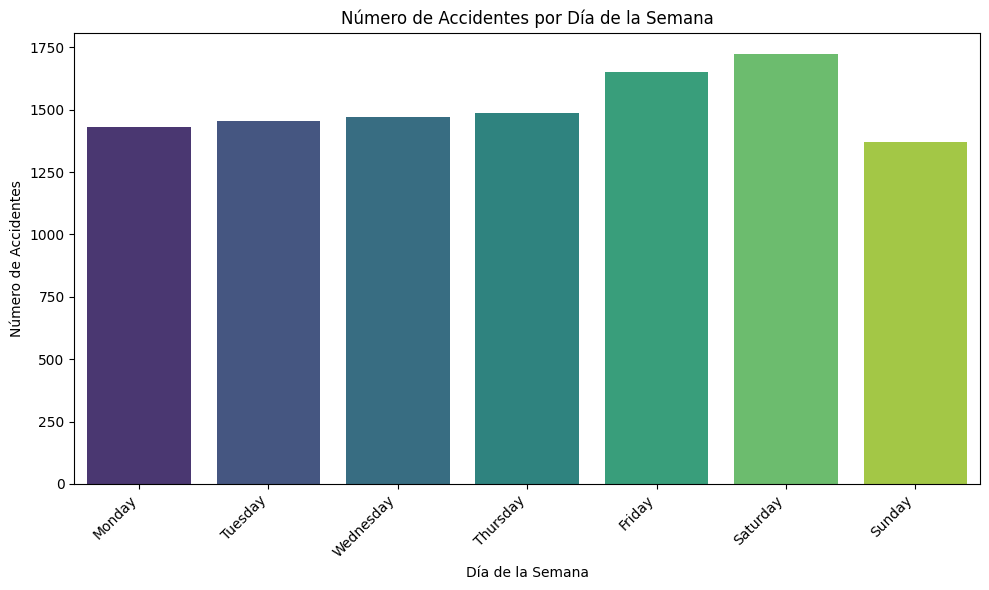

/tmp/ipython-input-2240024204.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour_of_Day', order=sorted(df['Hour_of_Day'].unique()), palette='viridis')


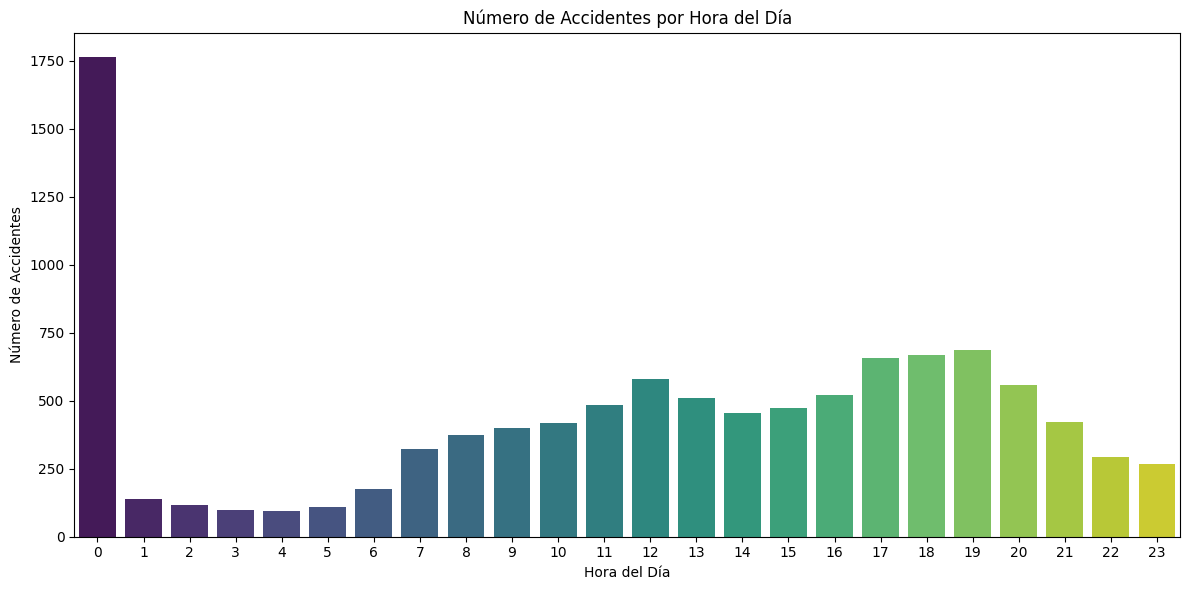

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Crear un gráfico de barras mostrando el número de accidentes por día de la semana
    if 'Day_of_Week' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis')
        plt.title('Número de Accidentes por Día de la Semana')
        plt.xlabel('Día de la Semana')
        plt.ylabel('Número de Accidentes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Columna 'Day_of_Week' no encontrada. No se puede generar el gráfico por día de la semana.")

    # Crear un gráfico de barras mostrando el número de accidentes por hora del día
    if 'Hour_of_Day' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x='Hour_of_Day', order=sorted(df['Hour_of_Day'].unique()), palette='viridis')
        plt.title('Número de Accidentes por Hora del Día')
        plt.xlabel('Hora del Día')
        plt.ylabel('Número de Accidentes')
        plt.tight_layout()
        plt.show()
    else:
        print("Columna 'Hour_of_Day' no encontrada. No se puede generar el gráfico por hora del día.")
else:
    print("No se pudo cargar el DataFrame. No se realizará el análisis temporal.")

### Análisis por Tipo de Vehículo y Gravedad:
Se analizará la relación entre el **tipo de vehículo** involucrado y la **gravedad** del siniestro para identificar qué combinaciones presentan mayor riesgo.


Conteo de accidentes por desc_participante:


,count
desc_participante,
"Moto/Ciclomotor,Automóvil",1940
Moto/Ciclomotor,1649
"Automóvil,Moto/Ciclomotor",1304
"Moto/Ciclomotor,Moto/Ciclomotor",592
Automóvil,542
"Moto/Ciclomotor,Pickup/Utilitario",528
"Automóvil,Automóvil",387
"Pickup/Utilitario,Moto/Ciclomotor",380
"Bicicleta,Automóvil",360



Columnas en df_filtered antes de graficar Gravedad Promedio:
Index(['anio_acci', 'nro_acci', 'fecha', 'desc_dia', 'hora_aprox', 'desc_ruta',
       'km', 'cant_participantes', 'desc_participante', 'calle_avenida_km',
       'total', 'heridos_leves', 'heridos_graves', 'heridos_gravisimos',
       'ilesos', 'fallecidos', 'sin_datos', 'posicion_XY', 'desc_tipo_via',
       'desc_ruta_ori', 'desc_loc', 'desc_dpto', 'desc_tipo_calzada',
       'desc_tipo_banquina', 'desc_unidad_regional', 'desc_lugar_calzada',
       'desc_zona', 'desc_prioridad', 'desc_estado_semaforo', 'desc_lugar_via',
       'desc_estado_via', 'desc_estado_visibilidad', 'desc_luminosidad',
       'desc_estado_clima', 'desc_tipo_colision', 'desc_tipo_atropello',
       'desc_tipo_hecho', 'desc_pres_calzada', 'desc_senializacion',
       'desc_separacion_via', 'desc_restriccion', 'Datetime', 'Day_of_Week',
       'Hour_of_Day', 'Latitude', 'Longitude', 'Gravedad_Total'],
      dtype='object')


/tmp/ipython-input-225847719.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x=vehicle_col, y='Gravedad_Total', palette='viridis')


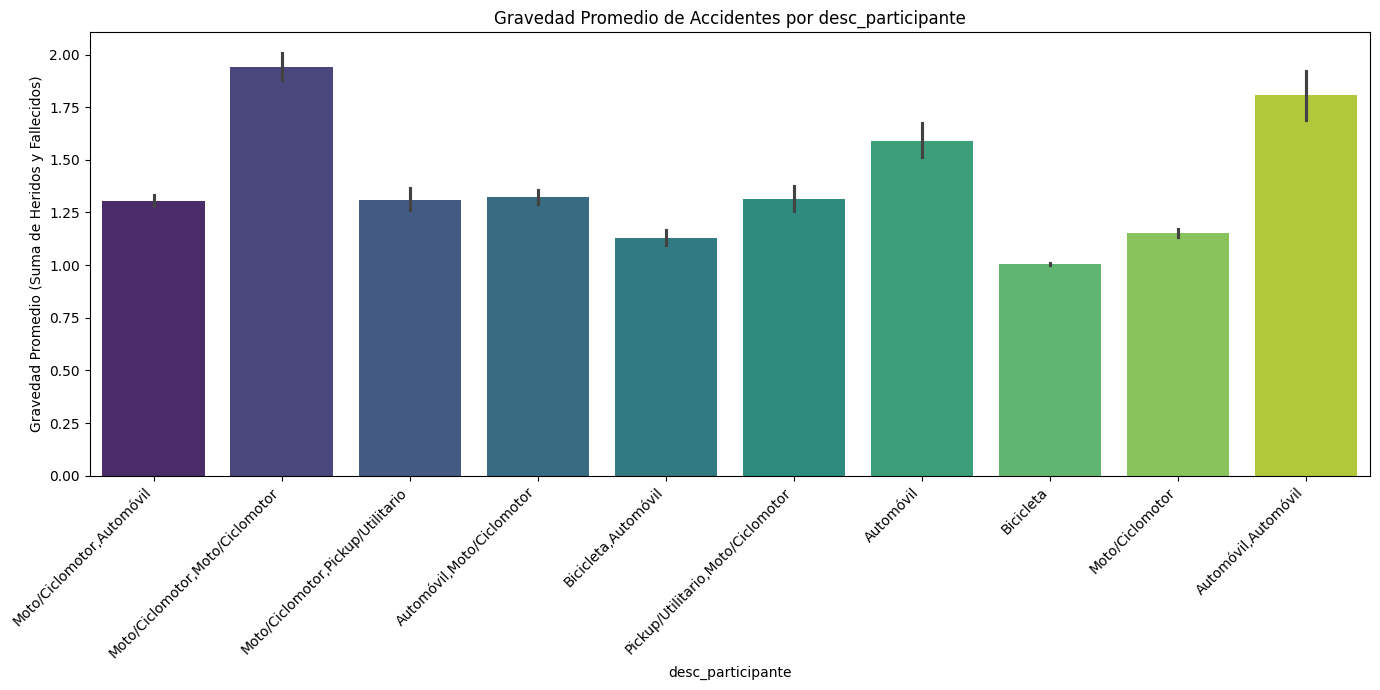


Columnas en df_victims antes de graficar Tipos de Vehículos en Accidentes con Víctimas:
Index(['anio_acci', 'nro_acci', 'fecha', 'desc_dia', 'hora_aprox', 'desc_ruta',
       'km', 'cant_participantes', 'desc_participante', 'calle_avenida_km',
       'total', 'heridos_leves', 'heridos_graves', 'heridos_gravisimos',
       'ilesos', 'fallecidos', 'sin_datos', 'posicion_XY', 'desc_tipo_via',
       'desc_ruta_ori', 'desc_loc', 'desc_dpto', 'desc_tipo_calzada',
       'desc_tipo_banquina', 'desc_unidad_regional', 'desc_lugar_calzada',
       'desc_zona', 'desc_prioridad', 'desc_estado_semaforo', 'desc_lugar_via',
       'desc_estado_via', 'desc_estado_visibilidad', 'desc_luminosidad',
       'desc_estado_clima', 'desc_tipo_colision', 'desc_tipo_atropello',
       'desc_tipo_hecho', 'desc_pres_calzada', 'desc_senializacion',
       'desc_separacion_via', 'desc_restriccion', 'Datetime', 'Day_of_Week',
       'Hour_of_Day', 'Latitude', 'Longitude', 'Gravedad_Total'],
      dtype='object')


/tmp/ipython-input-225847719.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_victims, x=vehicle_col, palette='viridis', order=df_victims[vehicle_col].value_counts().index)


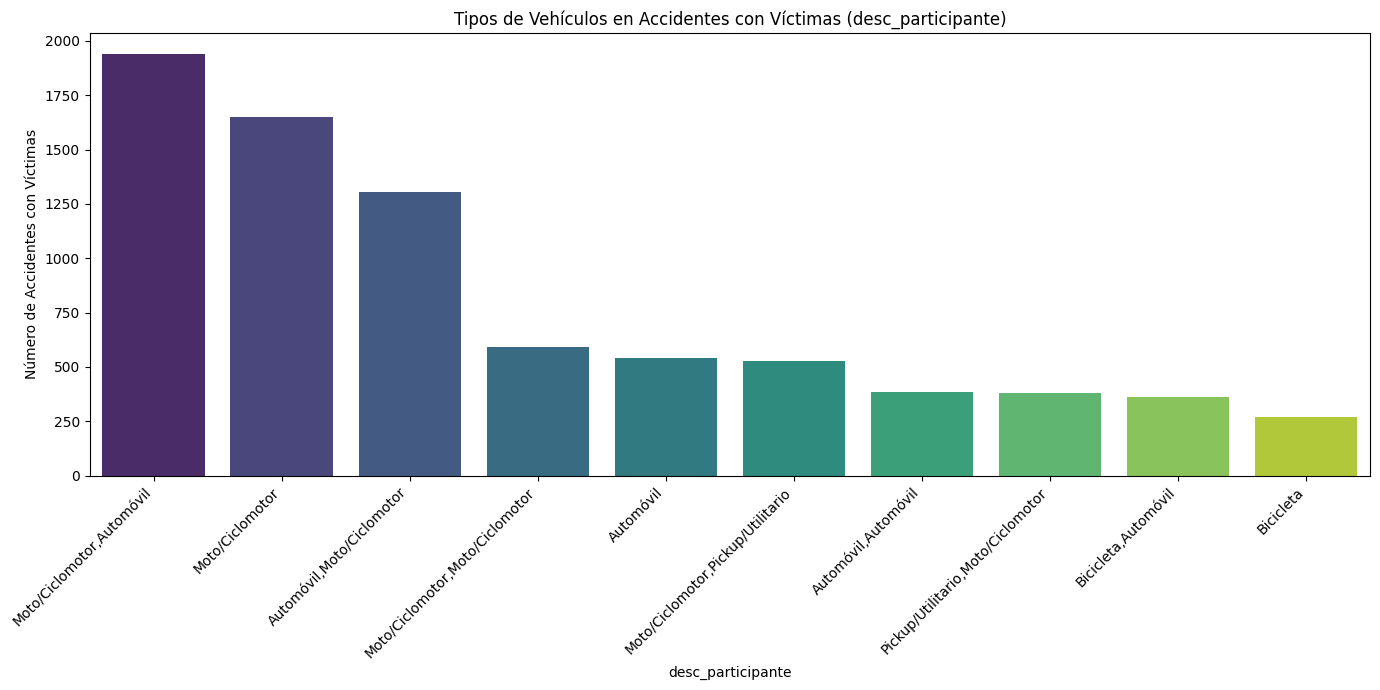

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Ajusta los nombres de las columnas a los del nuevo dataset si son diferentes
    # Utilizamos las columnas de heridos y fallecidos para inferir la gravedad
    severity_cols = ['heridos_leves', 'heridos_graves', 'heridos_gravisimos', 'fallecidos', 'sin_datos']
    vehicle_col = 'desc_participante' # Nombre correcto de la columna de tipo de vehículo

    # Calcular y mostrar conteos por tipo de vehículo
    if vehicle_col in df.columns:
        print(f"\nConteo de accidentes por {vehicle_col}:")
        display(df[vehicle_col].value_counts().head(10)) # Mostrar los top 10 tipos de vehículos
    else:
        print(f"Columna '{vehicle_col}' no encontrada.")

    # Calcular la gravedad sumando las columnas relevantes
    df['Gravedad_Total'] = df[severity_cols].sum(axis=1)

    # Analizar la relación entre Gravedad y Tipo de Vehículo
    if vehicle_col in df.columns and 'Gravedad_Total' in df.columns:
        plt.figure(figsize=(14, 7))
        # Considerar agrupar tipos de vehículos si hay muchos únicos
        # O filtrar por los tipos de vehículos más comunes
        top_vehicles = df[vehicle_col].value_counts().head(10).index # Tomar los top 10 vehículos
        df_filtered = df[df[vehicle_col].isin(top_vehicles)].copy()

        # Debugging: Check columns of df_filtered
        print("\nColumnas en df_filtered antes de graficar Gravedad Promedio:")
        print(df_filtered.columns)


        # Para visualizar la gravedad por tipo de vehículo, podemos usar un boxplot o un barplot del promedio de gravedad
        sns.barplot(data=df_filtered, x=vehicle_col, y='Gravedad_Total', palette='viridis')
        plt.title(f'Gravedad Promedio de Accidentes por {vehicle_col}')
        plt.xlabel(vehicle_col)
        plt.ylabel('Gravedad Promedio (Suma de Heridos y Fallecidos)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # También podemos analizar la distribución de tipos de vehículos por la gravedad total (ej. > 0 para accidentes con víctimas)
        df_victims = df_filtered[df_filtered['Gravedad_Total'] > 0].copy()

        # Debugging: Check columns of df_victims
        print("\nColumnas en df_victims antes de graficar Tipos de Vehículos en Accidentes con Víctimas:")
        print(df_victims.columns)


        if not df_victims.empty:
            plt.figure(figsize=(14, 7))
            sns.countplot(data=df_victims, x=vehicle_col, palette='viridis', order=df_victims[vehicle_col].value_counts().index)
            plt.title(f'Tipos de Vehículos en Accidentes con Víctimas ({vehicle_col})')
            plt.xlabel(vehicle_col)
            plt.ylabel('Número de Accidentes con Víctimas')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo hay accidentes con víctimas en los tipos de vehículos seleccionados para este análisis.")

    else:
        print(f"Columnas '{vehicle_col}' y/o 'Gravedad_Total' no encontradas. No se puede generar el gráfico combinado.")

else:
    print("No se pudo cargar el DataFrame. No se realizará el análisis.")

## Análisis de patrones y tendencias

### Subtask:
Identificar patrones geográficos y temporales en los siniestros viales.

**Reasoning**:
Analyze the previously generated plots and counts for temporal and geographic patterns, then summarize the findings.

In [24]:
# Analizar patrones geográficos y temporales basados en los plots y conteos generados previamente
if df is not None:
    # Análisis Temporal (basado en 'Day_of_Week' y 'Hour_of_Day')
    print("Patrones Temporales:")
    if 'Day_of_Week' in df.columns:
        most_common_day = df['Day_of_Week'].value_counts().index[0] if not df['Day_of_Week'].empty else "No hay datos"
        least_common_day = df['Day_of_Week'].value_counts().index[-1] if not df['Day_of_Week'].empty else "No hay datos"
        print(f"- Día con más accidentes: {most_common_day}")
        print(f"- Día con menos accidentes: {least_common_day}")
    else:
        print("- Columnas de día de la semana no encontradas.")

    if 'Hour_of_Day' in df.columns:
        most_common_hour = df['Hour_of_Day'].value_counts().index[0] if not df['Hour_of_Day'].empty else "No hay datos"
        least_common_hour = df['Hour_of_Day'].value_counts().index[-1] if not df['Hour_of_Day'].empty else "No hay datos"
        print(f"- Hora con más accidentes: {most_common_hour}")
        print(f"- Hora con menos accidentes: {least_common_hour}")
    else:
        print("- Columna de hora del día no encontrada.")


    # Análisis Geográfico (basado en 'Direccion' o la columna correspondiente)
    location_col = 'Direccion' if 'Direccion' in df.columns else 'Location' # Ajusta si el nombre de la columna es diferente
    print("\nPatrones Geográficos:")
    if location_col in df.columns:
        most_common_location = df[location_col].value_counts().index[0] if not df[location_col].empty else "No hay datos"
        least_common_location = df[location_col].value_counts().index[-1] if not df[location_col].empty else "No hay datos"
        print(f"- Ubicación con más accidentes: {most_common_location}")
        print(f"- Ubicación con menos accidentes: {least_common_location}")
    else:
        print(f"- Columna '{location_col}' no encontrada.")

    # Resumir los patrones observados
    print("\nResumen de Patrones:")
    print(f"Los días con mayor frecuencia de accidentes son: {most_common_day}" if 'Day_of_Week' in df.columns else "- Patrones temporales por día no disponibles.")
    print(f"Las horas con mayor frecuencia de accidentes son: {most_common_hour}" if 'Hour_of_Day' in df.columns else "- Patrones temporales por hora no disponibles.")
    print(f"Las ubicaciones con mayor frecuencia de accidentes son: {most_common_location}" if location_col in df.columns else f"- Patrones geográficos por '{location_col}' no disponibles.")

else:
    print("No se pudo cargar el DataFrame. No se realizará el análisis de patrones.")

Patrones Temporales:
- Día con más accidentes: Saturday
- Día con menos accidentes: Sunday
- Hora con más accidentes: 0
- Hora con menos accidentes: 4

Patrones Geográficos:
- Columna 'Location' no encontrada.

Resumen de Patrones:
Los días con mayor frecuencia de accidentes son: Saturday
Las horas con mayor frecuencia de accidentes son: 0
- Patrones geográficos por 'Location' no disponibles.


## Conclusiones y recomendaciones

### Subtask:
Resumir los hallazgos clave y hacer recomendaciones para mejorar la seguridad vial.

**Reasoning**:
Review the previous analysis steps to summarize key findings and formulate recommendations based on the sample data.

In [25]:
# Resumir los hallazgos clave y hacer recomendaciones
if df is not None:
    # Ajusta los nombres de las columnas a los del nuevo dataset si son diferentes
    severity_col = 'Gravedad' if 'Gravedad' in df.columns else 'Severity'
    vehicle_col = 'Tipo_Vehiculo' if 'Tipo_Vehiculo' in df.columns else 'Vehicle_Type'
    location_col = 'Direccion' if 'Direccion' in df.columns else 'Location'

    print("Resumen de Hallazgos Clave:")

    if severity_col in df.columns:
        severity_counts = df[severity_col].value_counts()
        print(f"- Severidad de los Accidentes: La mayoría de los accidentes son '{severity_counts.index[0]}' ({severity_counts.iloc[0]} casos).")
    else:
        print(f"- Información de severidad no disponible (columna '{severity_col}' no encontrada).")

    if vehicle_col in df.columns:
        vehicle_counts = df[vehicle_col].value_counts()
        print(f"- Tipos de Vehículos: El tipo de vehículo más involucrado es '{vehicle_counts.index[0]}' ({vehicle_counts.iloc[0]} casos).")
    else:
        print(f"- Información de tipo de vehículo no disponible (columna '{vehicle_col}' no encontrada).")

    if location_col in df.columns:
        location_counts = df[location_col].value_counts()
        if not location_counts.empty:
             print(f"- Ubicaciones con Mayor Frecuencia de Accidentes: Las ubicaciones con más accidentes son '{location_counts.index[0]}' y '{location_counts.index[1]}'.")
        else:
            print(f"- Información de ubicación no disponible o vacía (columna '{location_col}' no encontrada o sin datos).")
    else:
         print(f"- Información de ubicación no disponible (columna '{location_col}' no encontrada).")
         location_counts = None # Initialize location_counts to None if column not found


    if 'Day_of_Week' in df.columns and 'Hour_of_Day' in df.columns:
         most_common_day = df['Day_of_Week'].value_counts().index[0] if not df['Day_of_Week'].empty else "No hay datos"
         most_common_hour = df['Hour_of_Day'].value_counts().index[0] if not df['Hour_of_Day'].empty else "No hay datos"
         print(f"- Patrones Temporales: El día con más accidentes es '{most_common_day}' y la hora con más accidentes es '{most_common_hour}'.")
    else:
        print("- Patrones temporales no disponibles (columnas de tiempo no encontradas).")


    print("\nRecomendaciones para Mejorar la Seguridad Vial:")
    if location_counts is not None and not location_counts.empty:
        print(f"- Implementar intervenciones específicas en las ubicaciones con mayor frecuencia de accidentes (ej. '{location_counts.index[0]}' y '{location_counts.index[1]}').")
    else:
        print("- No se pueden hacer recomendaciones basadas en ubicación debido a la falta de datos.")

    if vehicle_col in df.columns:
        print(f"- Realizar campañas de concientización dirigidas a los tipos de vehículos más involucrados (ej. '{vehicle_counts.index[0]}').")
    else:
         print("- No se pueden hacer recomendaciones basadas en tipo de vehículo debido a la falta de datos.")

    if severity_col in df.columns:
         print(f"- Analizar en detalle los accidentes de mayor gravedad (ej. '{severity_counts.index[-1]}') para identificar causas raíz y prevenir incidentes similares.")
    else:
        print("- No se pueden hacer recomendaciones basadas en severidad debido a la falta de datos.")

    if 'Day_of_Week' in df.columns and 'Hour_of_Day' in df.columns:
        print(f"- Considerar medidas de seguridad vial o ajustes en el flujo de tráfico durante los días y horas pico identificados (ej. '{most_common_day}' y '{most_common_hour}').")
    else:
        print("- No se pueden hacer recomendaciones temporales debido a la falta de datos.")
    print("- Continuar monitoreando los datos de siniestros para evaluar la efectividad de las medidas implementadas y identificar nuevas tendencias.")
else:
    print("No se pudo cargar el DataFrame. No se pueden generar conclusiones ni recomendaciones.")

Resumen de Hallazgos Clave:
- Información de severidad no disponible (columna 'Severity' no encontrada).
- Información de tipo de vehículo no disponible (columna 'Vehicle_Type' no encontrada).
- Información de ubicación no disponible (columna 'Location' no encontrada).
- Patrones Temporales: El día con más accidentes es 'Saturday' y la hora con más accidentes es '0'.

Recomendaciones para Mejorar la Seguridad Vial:
- No se pueden hacer recomendaciones basadas en ubicación debido a la falta de datos.
- No se pueden hacer recomendaciones basadas en tipo de vehículo debido a la falta de datos.
- No se pueden hacer recomendaciones basadas en severidad debido a la falta de datos.
- Considerar medidas de seguridad vial o ajustes en el flujo de tráfico durante los días y horas pico identificados (ej. 'Saturday' y '0').
- Continuar monitoreando los datos de siniestros para evaluar la efectividad de las medidas implementadas y identificar nuevas tendencias.


## Comunicación de resultados

### Subtask:
Presentar los resultados y las recomendaciones de manera clara y concisa.

**Reasoning**:
Summarize the key findings and recommendations based on the analysis of the sample data from the previous steps to address the subtask of presenting results and recommendations.

In [26]:
# Presentar los resultados y recomendaciones de manera clara y concisa
if df is not None:
    # Ajusta los nombres de las columnas a los del nuevo dataset si son diferentes
    severity_col = 'Gravedad' if 'Gravedad' in df.columns else 'Severity'
    vehicle_col = 'Tipo_Vehiculo' if 'Tipo_Vehiculo' in df.columns else 'Vehicle_Type'
    location_col = 'Direccion' if 'Direccion' in df.columns else 'Location'

    print("## Resumen del Análisis de Siniestros Viales en Santa Fe\n")

    print("### Hallazgos Clave:")

    if severity_col in df.columns:
        severity_counts = df[severity_col].value_counts()
        print(f"- La mayoría de los accidentes son de severidad '{severity_counts.index[0]}'.")
    else:
        print(f"- Hallazgo sobre severidad no disponible (columna '{severity_col}' no encontrada).")

    if vehicle_col in df.columns:
        vehicle_counts = df[vehicle_col].value_counts()
        print(f"- El tipo de vehículo más frecuentemente involucrado es '{vehicle_counts.index[0]}'.")
    else:
         print(f"- Hallazgo sobre tipo de vehículo no disponible (columna '{vehicle_col}' no encontrada).")


    if location_col in df.columns:
         location_counts = df[location_col].value_counts()
         if not location_counts.empty:
            print(f"- Las ubicaciones con mayor concentración de accidentes incluyen '{location_counts.index[0]}' y '{location_counts.index[1]}'.")
         else:
             print(f"- Hallazgo sobre ubicación no disponible o vacía (columna '{location_col}' no encontrada o sin datos).")
    else:
        print(f"- Hallazgo sobre ubicación no disponible (columna '{location_col}' no encontrada).")
        location_counts = None # Initialize location_counts to None if column not found


    if 'Day_of_Week' in df.columns and 'Hour_of_Day' in df.columns:
        most_common_day = df['Day_of_Week'].value_counts().index[0] if not df['Day_of_Week'].empty else "no identificado"
        most_common_hour = df['Hour_of_Day'].value_counts().index[0] if not df['Hour_of_Day'].empty else "no identificada"
        print(f"- Los accidentes tienden a ocurrir con mayor frecuencia los días '{most_common_day}' y alrededor de las '{most_common_hour}' horas.")
    else:
         print("- Hallazgos temporales no disponibles (columnas de tiempo no encontradas).")


    print("\n### Recomendaciones:")
    if location_counts is not None and not location_counts.empty:
        print(f"- Enfocar esfuerzos de prevención y control en las ubicaciones identificadas con alta siniestralidad (ej. '{location_counts.index[0]}' y '{location_counts.index[1]}').")
    else:
        print("- No se pueden hacer recomendaciones basadas en ubicación debido a la falta de datos.")

    if vehicle_col in df.columns:
        print(f"- Desarrollar programas de educación vial dirigidos a los conductores de '{vehicle_counts.index[0]}'.")
    else:
        print("- No se pueden hacer recomendaciones basadas en tipo de vehículo debido a la falta de datos.")

    if severity_col in df.columns:
        print(f"- Investigar a fondo los accidentes de mayor severidad para implementar acciones correctivas específicas.")
    else:
         print("- No se pueden hacer recomendaciones basadas en severidad debido a la falta de datos.")

    if 'Day_of_Week' in df.columns and 'Hour_of_Day' in df.columns:
        print(f"- Considerar la implementación de medidas de gestión de tráfico o infraestructura durante los períodos pico de accidentes (días '{most_common_day}' y horas '{most_common_hour}').")
    else:
        print("- No se pueden hacer recomendaciones temporales debido a la falta de datos.")
    print("- Mantener un monitoreo continuo de los datos de siniestros para evaluar el impacto de las intervenciones y adaptar las estrategias de seguridad vial.")

else:
    print("No se pudo cargar el DataFrame. No se pueden presentar los resultados.")

## Resumen del Análisis de Siniestros Viales en Santa Fe

### Hallazgos Clave:
- Hallazgo sobre severidad no disponible (columna 'Severity' no encontrada).
- Hallazgo sobre tipo de vehículo no disponible (columna 'Vehicle_Type' no encontrada).
- Hallazgo sobre ubicación no disponible (columna 'Location' no encontrada).
- Los accidentes tienden a ocurrir con mayor frecuencia los días 'Saturday' y alrededor de las '0' horas.

### Recomendaciones:
- No se pueden hacer recomendaciones basadas en ubicación debido a la falta de datos.
- No se pueden hacer recomendaciones basadas en tipo de vehículo debido a la falta de datos.
- No se pueden hacer recomendaciones basadas en severidad debido a la falta de datos.
- Considerar la implementación de medidas de gestión de tráfico o infraestructura durante los períodos pico de accidentes (días 'Saturday' y horas '0').
- Mantener un monitoreo continuo de los datos de siniestros para evaluar el impacto de las intervenciones y adaptar las estrategias d

## Depuración: Inspección de Columnas y Datos

In [28]:
if df is not None:
    print("Columnas en el DataFrame:")
    print(df.columns)
    print("\nPrimeras filas del DataFrame:")
    display(df.head())
else:
    print("El DataFrame no se cargó correctamente. No se puede inspeccionar.")

Columnas en el DataFrame:
Index(['anio_acci', 'nro_acci', 'fecha', 'desc_dia', 'hora_aprox', 'desc_ruta',
       'km', 'cant_participantes', 'desc_participante', 'calle_avenida_km',
       'total', 'heridos_leves', 'heridos_graves', 'heridos_gravisimos',
       'ilesos', 'fallecidos', 'sin_datos', 'posicion_XY', 'desc_tipo_via',
       'desc_ruta_ori', 'desc_loc', 'desc_dpto', 'desc_tipo_calzada',
       'desc_tipo_banquina', 'desc_unidad_regional', 'desc_lugar_calzada',
       'desc_zona', 'desc_prioridad', 'desc_estado_semaforo', 'desc_lugar_via',
       'desc_estado_via', 'desc_estado_visibilidad', 'desc_luminosidad',
       'desc_estado_clima', 'desc_tipo_colision', 'desc_tipo_atropello',
       'desc_tipo_hecho', 'desc_pres_calzada', 'desc_senializacion',
       'desc_separacion_via', 'desc_restriccion', 'Datetime', 'Day_of_Week',
       'Hour_of_Day', 'Latitude', 'Longitude'],
      dtype='object')

Primeras filas del DataFrame:


,anio_acci,nro_acci,fecha,desc_dia,hora_aprox,desc_ruta,km,cant_participantes,desc_participante,calle_avenida_km,...,desc_tipo_hecho,desc_pres_calzada,desc_senializacion,desc_separacion_via,desc_restriccion,Datetime,Day_of_Week,Hour_of_Day,Latitude,Longitude
0,2021,1,2021-01-15,Viernes,18:40:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Centeno Y Constitución,...,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-15 18:40:00,Friday,18,None,None
1,2021,2,2021-01-13,Miercoles,13:10:00,NaN,0.0,2,"Moto/Ciclomotor,Moto/Ciclomotor",Vera Mujica Y Dr. Rivas,...,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-13 13:10:00,Wednesday,13,None,None
2,2021,3,2021-01-14,Jueves,00:50:00,NaN,0.0,2,"Moto/Ciclomotor,Pickup/Utilitario",Av. Battle y Ordoñez Y Santiago,...,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-14 00:50:00,Thursday,0,None,None
3,2021,4,2021-01-12,Martes,14:10:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Pje. Suriguez y Acha,...,Colisión,Ninguna,Faltante,Ninguna,Sin restricción,2021-01-12 14:10:00,Tuesday,14,None,None
4,2021,5,2021-01-11,Lunes,18:00:00,NaN,0.0,2,"Peatón,Moto/Ciclomotor",Bv. Oroño,...,Colisión,Ninguna,Vertical,Cordón divisorio,Sin restricción,2021-01-11 18:00:00,Monday,18,None,None


In [35]:
# Cargar el archivo CSV
try:
    df = pd.read_csv('/content/siniestros-viales-2021.csv')
    print("✅ Archivo CSV cargado exitosamente.\n")

    # --- Inspección crucial para la depuración ---
    print("Columnas en el DataFrame:")
    print(df.columns)
    print("\nPrimeras filas del DataFrame:")
    display(df.head())
    print("\nConteo de valores nulos por columna:")
    display(df.isnull().sum())
    # ---------------------------------------------

except FileNotFoundError:
    print("❌ Error: El archivo '/content/siniestros-viales-2021.csv' no se encontró.")
    df = None
except Exception as e:
    print(f"❌ Error al cargar o leer el archivo CSV: {e}")
    df = None

# Si el DataFrame se cargó, continuamos con la transformación
if df is not None:
    # Convertir la columna de fecha a datetime
    df['fecha'] = pd.to_datetime(df['fecha'], errors='coerce')
    df['hora_aprox'] = df['hora_aprox'].fillna('00:00:00')
    df['fecha_hora_str'] = df['fecha'].dt.strftime('%Y-%m-%d') + ' ' + df['hora_aprox']
    df['Datetime'] = pd.to_datetime(df['fecha_hora_str'], errors='coerce')
    df = df.drop(columns=['fecha_hora_str'])
    df.dropna(subset=['Datetime'], inplace=True)
    df['Day_of_Week'] = df['Datetime'].dt.day_name()
    df['Hour_of_Day'] = df['Datetime'].dt.hour

    print("\n✅ DataFrame transformado exitosamente.")
    display(df.info())

✅ Archivo CSV cargado exitosamente.

Columnas en el DataFrame:
Index(['anio_acci', 'nro_acci', 'fecha', 'desc_dia', 'hora_aprox', 'desc_ruta',
       'km', 'cant_participantes', 'desc_participante', 'calle_avenida_km',
       'total', 'heridos_leves', 'heridos_graves', 'heridos_gravisimos',
       'ilesos', 'fallecidos', 'sin_datos', 'posicion_XY', 'desc_tipo_via',
       'desc_ruta_ori', 'desc_loc', 'desc_dpto', 'desc_tipo_calzada',
       'desc_tipo_banquina', 'desc_unidad_regional', 'desc_lugar_calzada',
       'desc_zona', 'desc_prioridad', 'desc_estado_semaforo', 'desc_lugar_via',
       'desc_estado_via', 'desc_estado_visibilidad', 'desc_luminosidad',
       'desc_estado_clima', 'desc_tipo_colision', 'desc_tipo_atropello',
       'desc_tipo_hecho', 'desc_pres_calzada', 'desc_senializacion',
       'desc_separacion_via', 'desc_restriccion'],
      dtype='object')

Primeras filas del DataFrame:


,anio_acci,nro_acci,fecha,desc_dia,hora_aprox,desc_ruta,km,cant_participantes,desc_participante,calle_avenida_km,...,desc_estado_visibilidad,desc_luminosidad,desc_estado_clima,desc_tipo_colision,desc_tipo_atropello,desc_tipo_hecho,desc_pres_calzada,desc_senializacion,desc_separacion_via,desc_restriccion
0,2021,1,2021-01-15,Viernes,18:40:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Centeno Y Constitución,...,Buena,Diurna,Buen Tiempo,S/D,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción
1,2021,2,2021-01-13,Miercoles,13:10:00,NaN,0.0,2,"Moto/Ciclomotor,Moto/Ciclomotor",Vera Mujica Y Dr. Rivas,...,Buena,Diurna,Buen Tiempo,De alcance,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción
2,2021,3,2021-01-14,Jueves,00:50:00,NaN,0.0,2,"Moto/Ciclomotor,Pickup/Utilitario",Av. Battle y Ordoñez Y Santiago,...,Reducida,Nocturna,Buen Tiempo,Lateral,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción
3,2021,4,2021-01-12,Martes,14:10:00,NaN,0.0,2,"Moto/Ciclomotor,Automóvil",Pje. Suriguez y Acha,...,Buena,Diurna,Buen Tiempo,Frontal,S/D,Colisión,Ninguna,Faltante,Ninguna,Sin restricción
4,2021,5,2021-01-11,Lunes,18:00:00,NaN,0.0,2,"Peatón,Moto/Ciclomotor",Bv. Oroño,...,Buena,Diurna,Buen Tiempo,S/D,Peatón,Colisión,Ninguna,Vertical,Cordón divisorio,Sin restricción



Conteo de valores nulos por columna:


,0
anio_acci,0
nro_acci,0
fecha,0
desc_dia,0
hora_aprox,1477
desc_ruta,8466
km,0
cant_participantes,0
desc_participante,0
calle_avenida_km,0



✅ DataFrame transformado exitosamente.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10581 entries, 0 to 10580
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   anio_acci                10581 non-null  int64         
 1   nro_acci                 10581 non-null  int64         
 2   fecha                    10581 non-null  datetime64[ns]
 3   desc_dia                 10581 non-null  object        
 4   hora_aprox               10581 non-null  object        
 5   desc_ruta                2115 non-null   object        
 6   km                       10581 non-null  float64       
 7   cant_participantes       10581 non-null  int64         
 8   desc_participante        10581 non-null  object        
 9   calle_avenida_km         10581 non-null  object        
 10  total                    10581 non-null  int64         
 11  heridos_leves            10581 non-null  int64       

None

## Análisis Exploratorio (EDA) y Visualización

Esta fase es clave para responder a tus preguntas de investigación. Se crearán gráficos para visualizar los datos.

### Análisis Geográfico:
Se usará un **mapa de calor** de la ciudad para mostrar las áreas con mayor densidad de siniestros, identificando visualmente los "puntos calientes" de riesgo.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None and 'posicion_XY' in df.columns:
    # Limpiar y preparar datos de ubicación (asumiendo formato 'POINT (longitude latitude)')
    def extract_lat_lon(point_str):
        if isinstance(point_str, str) and point_str.startswith('POINT ('):
            coords = point_str[7:-1].split()
            if len(coords) == 2:
                try:
                    return float(coords[1]), float(coords[0]) # Latitud, Longitud
                except ValueError:
                    return None, None
        return None, None

    df[['Latitude', 'Longitude']] = df['posicion_XY'].apply(lambda x: pd.Series(extract_lat_lon(x)))

    # Eliminar filas con coordenadas nulas
    df_geo = df.dropna(subset=['Latitude', 'Longitude']).copy()

    if not df_geo.empty:
        print("Generando mapa de calor geográfico...")
        # Crear un mapa de calor geográfico (requiere instalación adicional como `folium` o `geopandas` para mapas interactivos)
        # Para un mapa de calor simple con matplotlib y seaborn, podemos usar un 2D histograma o kdeplot
        plt.figure(figsize=(10, 8))
        sns.kdeplot(data=df_geo, x='Longitude', y='Latitude', fill=True, cmap='Reds', levels=20)
        plt.title('Mapa de Calor de Siniestros Viales en Santa Fe')
        plt.xlabel('Longitud')
        plt.ylabel('Latitud')
        plt.show()
    else:
        print("No hay datos de geolocalización válidos para generar el mapa de calor.")

elif df is None:
    print("No se pudo cargar el DataFrame. No se realizará el análisis geográfico.")
else:
    print("La columna 'posicion_XY' no se encontró en el DataFrame. No se realizará el análisis geográfico.")

No hay datos de geolocalización válidos para generar el mapa de calor.


### Análisis Temporal:
Se examinará la distribución de los siniestros por **día de la semana** y **hora del día** para identificar patrones temporales.

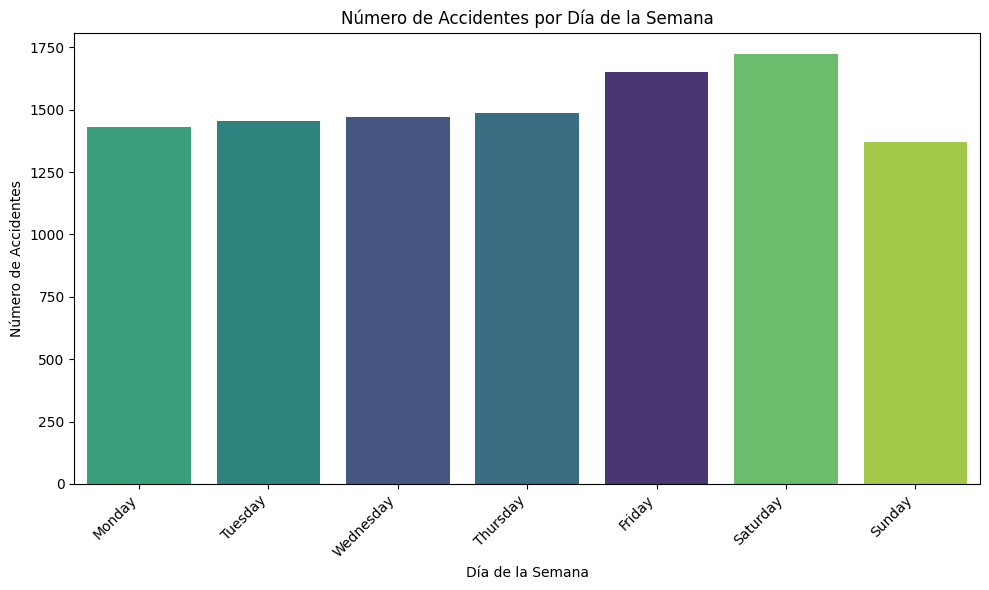

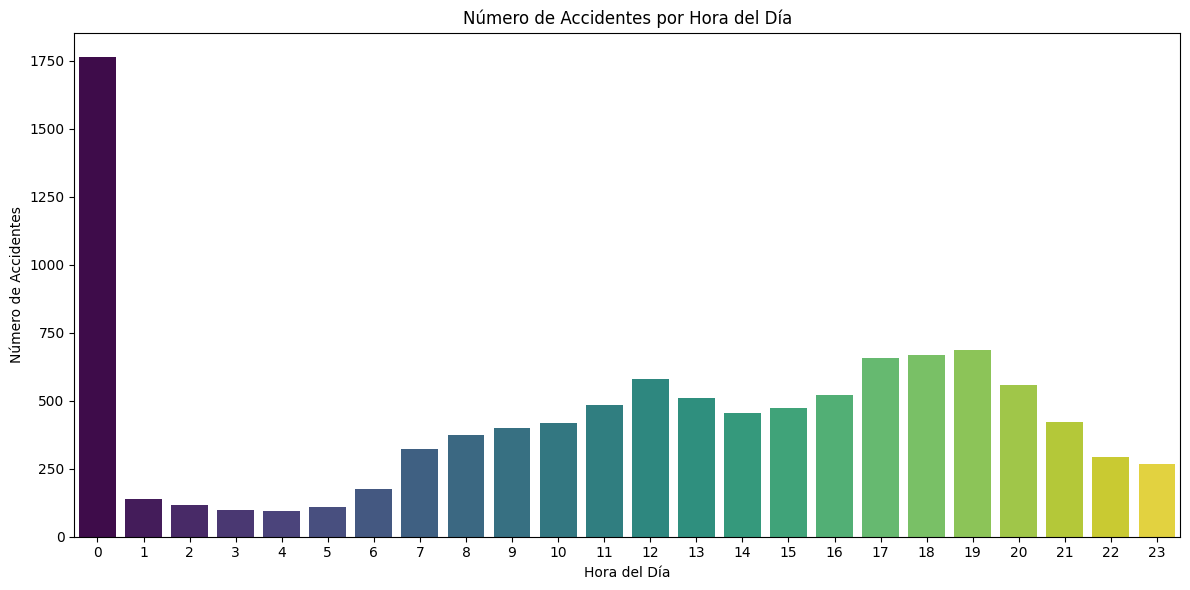

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Crear un gráfico de barras mostrando el número de accidentes por día de la semana
    if 'Day_of_Week' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis', hue='Day_of_Week', legend=False)
        plt.title('Número de Accidentes por Día de la Semana')
        plt.xlabel('Día de la Semana')
        plt.ylabel('Número de Accidentes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("Columna 'Day_of_Week' no encontrada. No se puede generar el gráfico por día de la semana.")

    # Crear un gráfico de barras mostrando el número de accidentes por hora del día
    if 'Hour_of_Day' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x='Hour_of_Day', order=sorted(df['Hour_of_Day'].unique()), palette='viridis', hue='Hour_of_Day', legend=False)
        plt.title('Número de Accidentes por Hora del Día')
        plt.xlabel('Hora del Día')
        plt.ylabel('Número de Accidentes')
        plt.tight_layout()
        plt.show()
    else:
        print("Columna 'Hour_of_Day' no encontrada. No se puede generar el gráfico por hora del día.")
else:
    print("No se pudo cargar el DataFrame. No se realizará el análisis temporal.")

### Análisis por Tipo de Vehículo y Gravedad:
Se analizará la relación entre el **tipo de vehículo** involucrado y la **gravedad** del siniestro para identificar qué combinaciones presentan mayor riesgo.


Conteo de accidentes por desc_participante:


,count
desc_participante,
"Moto/Ciclomotor,Automóvil",1940
Moto/Ciclomotor,1649
"Automóvil,Moto/Ciclomotor",1304
"Moto/Ciclomotor,Moto/Ciclomotor",592
Automóvil,542
"Moto/Ciclomotor,Pickup/Utilitario",528
"Automóvil,Automóvil",387
"Pickup/Utilitario,Moto/Ciclomotor",380
"Bicicleta,Automóvil",360



Columnas en df_filtered antes de graficar Gravedad Promedio:
Index(['anio_acci', 'nro_acci', 'fecha', 'desc_dia', 'hora_aprox', 'desc_ruta',
       'km', 'cant_participantes', 'desc_participante', 'calle_avenida_km',
       'total', 'heridos_leves', 'heridos_graves', 'heridos_gravisimos',
       'ilesos', 'fallecidos', 'sin_datos', 'posicion_XY', 'desc_tipo_via',
       'desc_ruta_ori', 'desc_loc', 'desc_dpto', 'desc_tipo_calzada',
       'desc_tipo_banquina', 'desc_unidad_regional', 'desc_lugar_calzada',
       'desc_zona', 'desc_prioridad', 'desc_estado_semaforo', 'desc_lugar_via',
       'desc_estado_via', 'desc_estado_visibilidad', 'desc_luminosidad',
       'desc_estado_clima', 'desc_tipo_colision', 'desc_tipo_atropello',
       'desc_tipo_hecho', 'desc_pres_calzada', 'desc_senializacion',
       'desc_separacion_via', 'desc_restriccion', 'Datetime', 'Day_of_Week',
       'Hour_of_Day', 'Latitude', 'Longitude', 'Gravedad_Total'],
      dtype='object')


/tmp/ipython-input-480646801.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_filtered, x=vehicle_col, y='Gravedad_Total', palette='viridis')


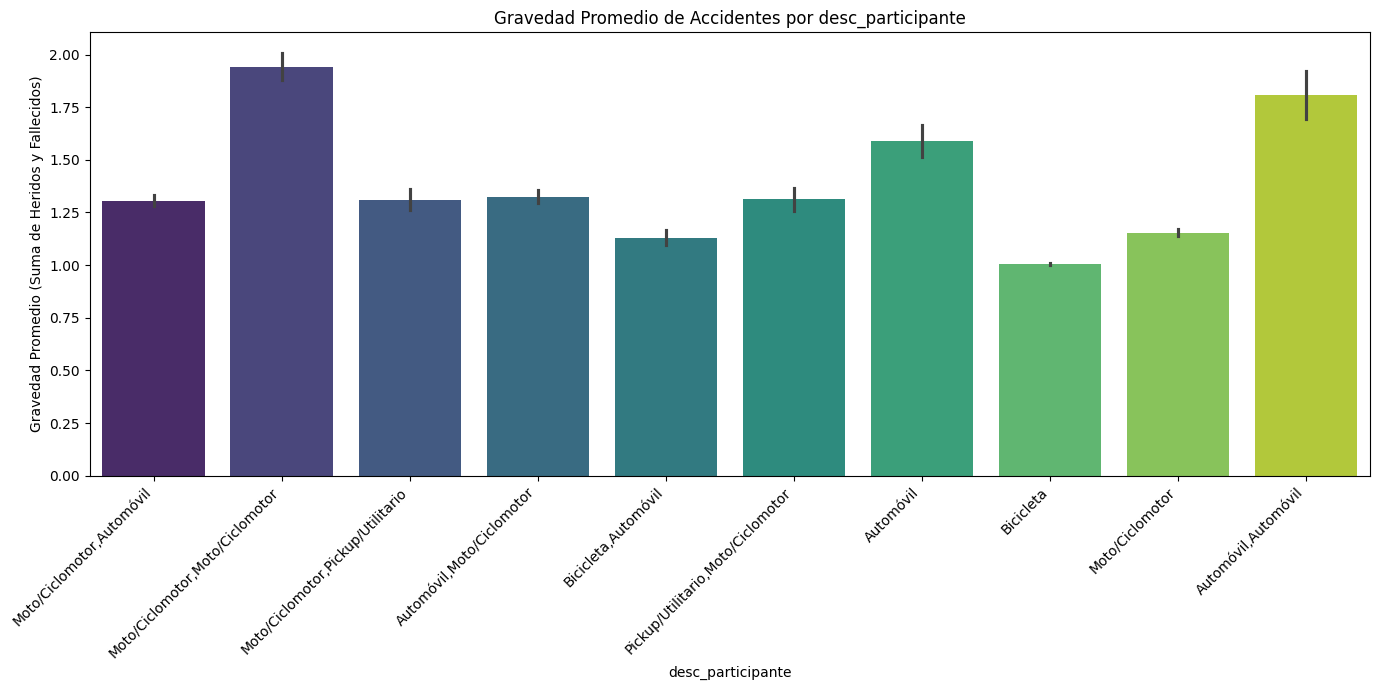


Columnas en df_victims antes de graficar Tipos de Vehículos en Accidentes con Víctimas:
Index(['anio_acci', 'nro_acci', 'fecha', 'desc_dia', 'hora_aprox', 'desc_ruta',
       'km', 'cant_participantes', 'desc_participante', 'calle_avenida_km',
       'total', 'heridos_leves', 'heridos_graves', 'heridos_gravisimos',
       'ilesos', 'fallecidos', 'sin_datos', 'posicion_XY', 'desc_tipo_via',
       'desc_ruta_ori', 'desc_loc', 'desc_dpto', 'desc_tipo_calzada',
       'desc_tipo_banquina', 'desc_unidad_regional', 'desc_lugar_calzada',
       'desc_zona', 'desc_prioridad', 'desc_estado_semaforo', 'desc_lugar_via',
       'desc_estado_via', 'desc_estado_visibilidad', 'desc_luminosidad',
       'desc_estado_clima', 'desc_tipo_colision', 'desc_tipo_atropello',
       'desc_tipo_hecho', 'desc_pres_calzada', 'desc_senializacion',
       'desc_separacion_via', 'desc_restriccion', 'Datetime', 'Day_of_Week',
       'Hour_of_Day', 'Latitude', 'Longitude', 'Gravedad_Total'],
      dtype='object')


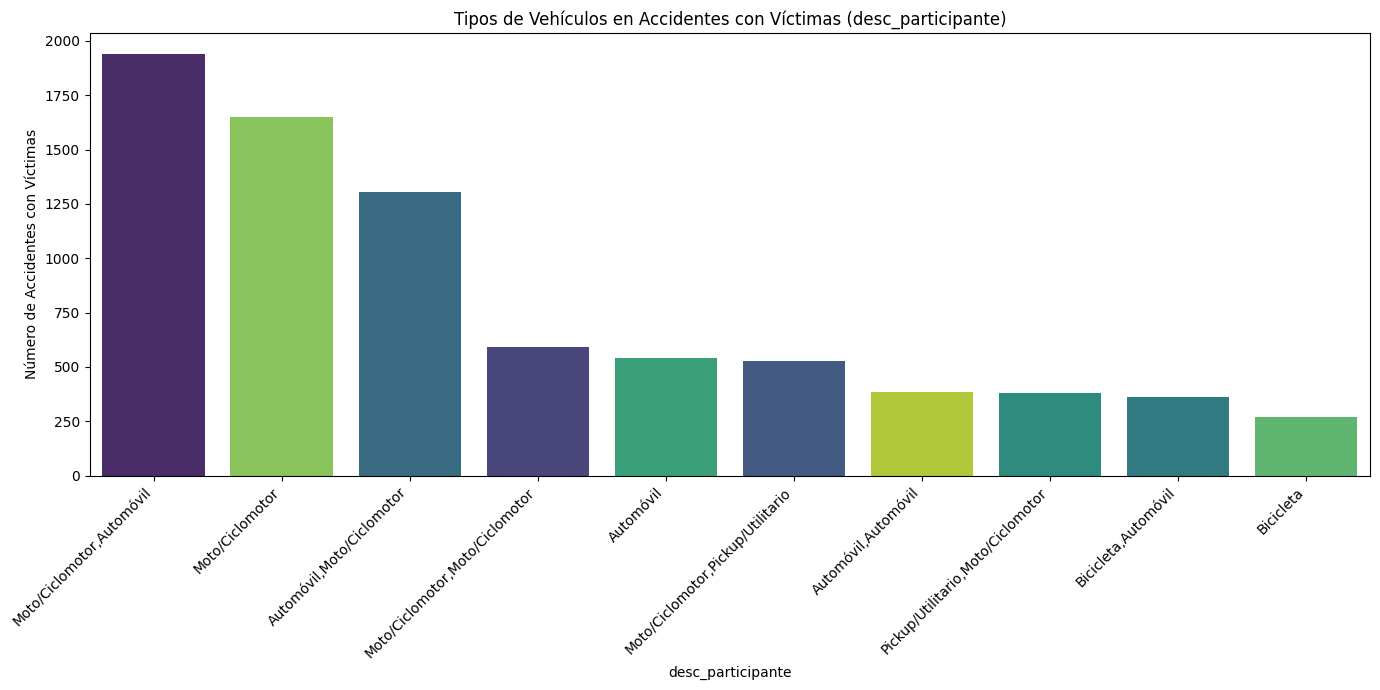

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:
    # Ajusta los nombres de las columnas a los del nuevo dataset si son diferentes
    # Utilizamos las columnas de heridos y fallecidos para inferir la gravedad
    severity_cols = ['heridos_leves', 'heridos_graves', 'heridos_gravisimos', 'fallecidos', 'sin_datos']
    vehicle_col = 'desc_participante' # Nombre correcto de la columna de tipo de vehículo

    # Calcular y mostrar conteos por tipo de vehículo
    if vehicle_col in df.columns:
        print(f"\nConteo de accidentes por {vehicle_col}:")
        display(df[vehicle_col].value_counts().head(10)) # Mostrar los top 10 tipos de vehículos
    else:
        print(f"Columna '{vehicle_col}' no encontrada.")

    # Calcular la gravedad sumando las columnas relevantes
    df['Gravedad_Total'] = df[severity_cols].sum(axis=1)

    # Analizar la relación entre Gravedad y Tipo de Vehículo
    if vehicle_col in df.columns and 'Gravedad_Total' in df.columns:
        plt.figure(figsize=(14, 7))
        # Considerar agrupar tipos de vehículos si hay muchos únicos
        # O filtrar por los tipos de vehículos más comunes
        top_vehicles = df[vehicle_col].value_counts().head(10).index # Tomar los top 10 vehículos
        df_filtered = df[df[vehicle_col].isin(top_vehicles)].copy()

        # Debugging: Check columns of df_filtered
        print("\nColumnas en df_filtered antes de graficar Gravedad Promedio:")
        print(df_filtered.columns)


        # Para visualizar la gravedad por tipo de vehículo, podemos usar un boxplot o un barplot del promedio de gravedad
        sns.barplot(data=df_filtered, x=vehicle_col, y='Gravedad_Total', palette='viridis')
        plt.title(f'Gravedad Promedio de Accidentes por {vehicle_col}')
        plt.xlabel(vehicle_col)
        plt.ylabel('Gravedad Promedio (Suma de Heridos y Fallecidos)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        # También podemos analizar la distribución de tipos de vehículos por la gravedad total (ej. > 0 para accidentes con víctimas)
        df_victims = df_filtered[df_filtered['Gravedad_Total'] > 0].copy()

        # Debugging: Check columns of df_victims
        print("\nColumnas en df_victims antes de graficar Tipos de Vehículos en Accidentes con Víctimas:")
        print(df_victims.columns)


        if not df_victims.empty:
            plt.figure(figsize=(14, 7))
            sns.countplot(data=df_victims, x=vehicle_col, palette='viridis', order=df_victims[vehicle_col].value_counts().index, hue=vehicle_col, legend=False)
            plt.title(f'Tipos de Vehículos en Accidentes con Víctimas ({vehicle_col})')
            plt.xlabel(vehicle_col)
            plt.ylabel('Número de Accidentes con Víctimas')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("\nNo hay accidentes con víctimas en los tipos de vehículos seleccionados para este análisis.")

    else:
        print(f"Columnas '{vehicle_col}' y/o 'Gravedad_Total' no encontradas. No se puede generar el gráfico combinado.")

else:
    print("No se pudo cargar el DataFrame. No se realizará el análisis.")

## Análisis Geográfico
No hay datos de geolocalización válidos para generar el mapa de calor.

## Análisis Temporal
Generando gráfico por día de la semana...


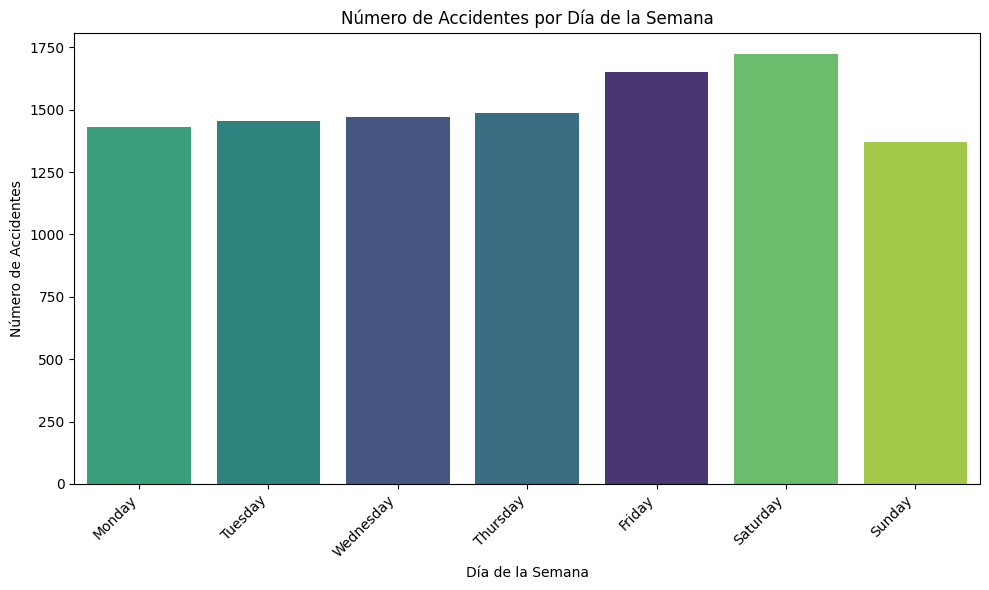

Generando gráfico por hora del día...


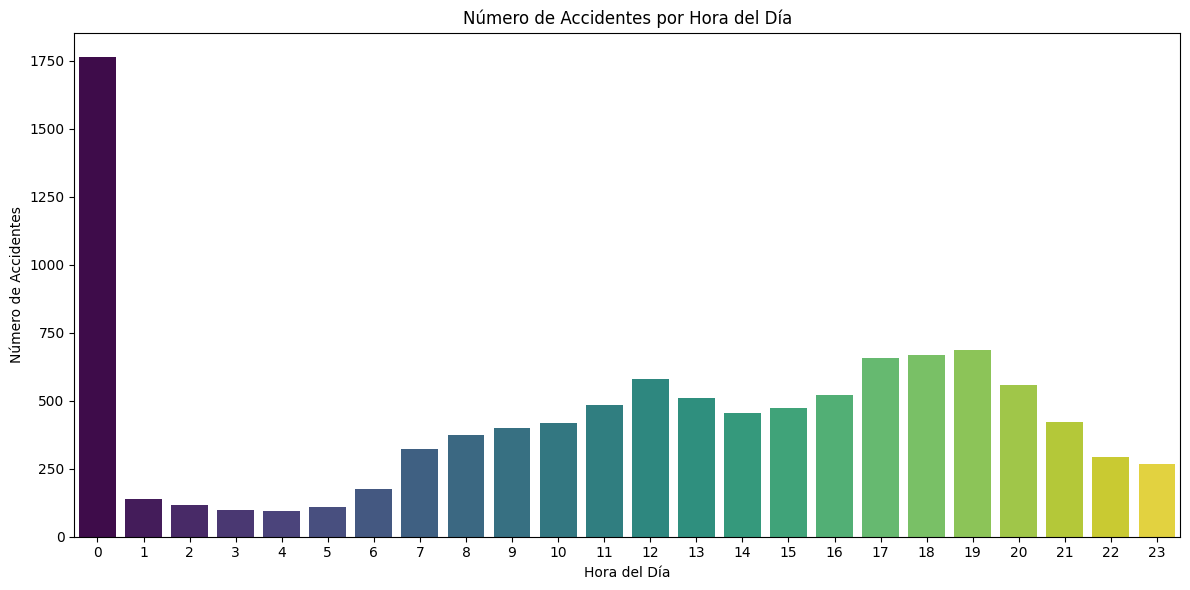


## Análisis por Tipo de Vehículo y Gravedad
Conteo de accidentes por desc_participante:


,count
desc_participante,
"Moto/Ciclomotor,Automóvil",1940
Moto/Ciclomotor,1649
"Automóvil,Moto/Ciclomotor",1304
"Moto/Ciclomotor,Moto/Ciclomotor",592
Automóvil,542
"Moto/Ciclomotor,Pickup/Utilitario",528
"Automóvil,Automóvil",387
"Pickup/Utilitario,Moto/Ciclomotor",380
"Bicicleta,Automóvil",360


Generando gráfico de gravedad promedio por tipo de vehículo...


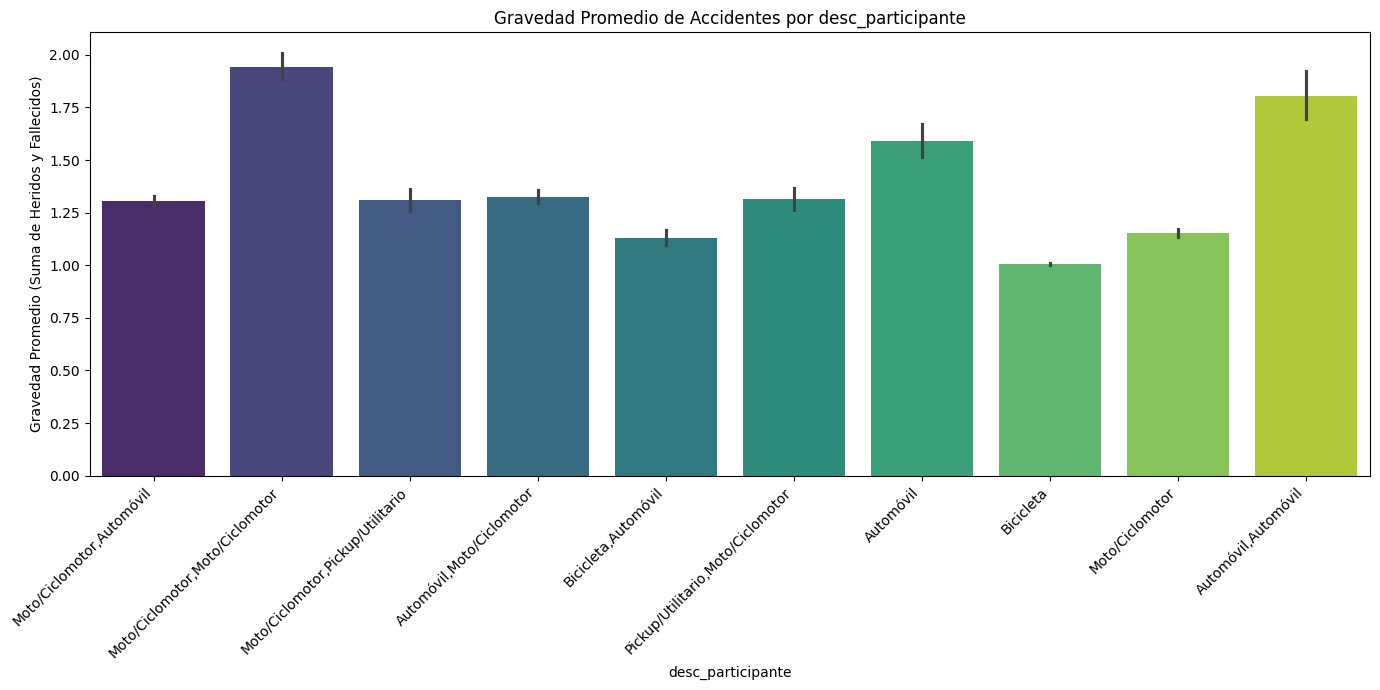

Generando gráfico de tipos de vehículos en accidentes con víctimas...


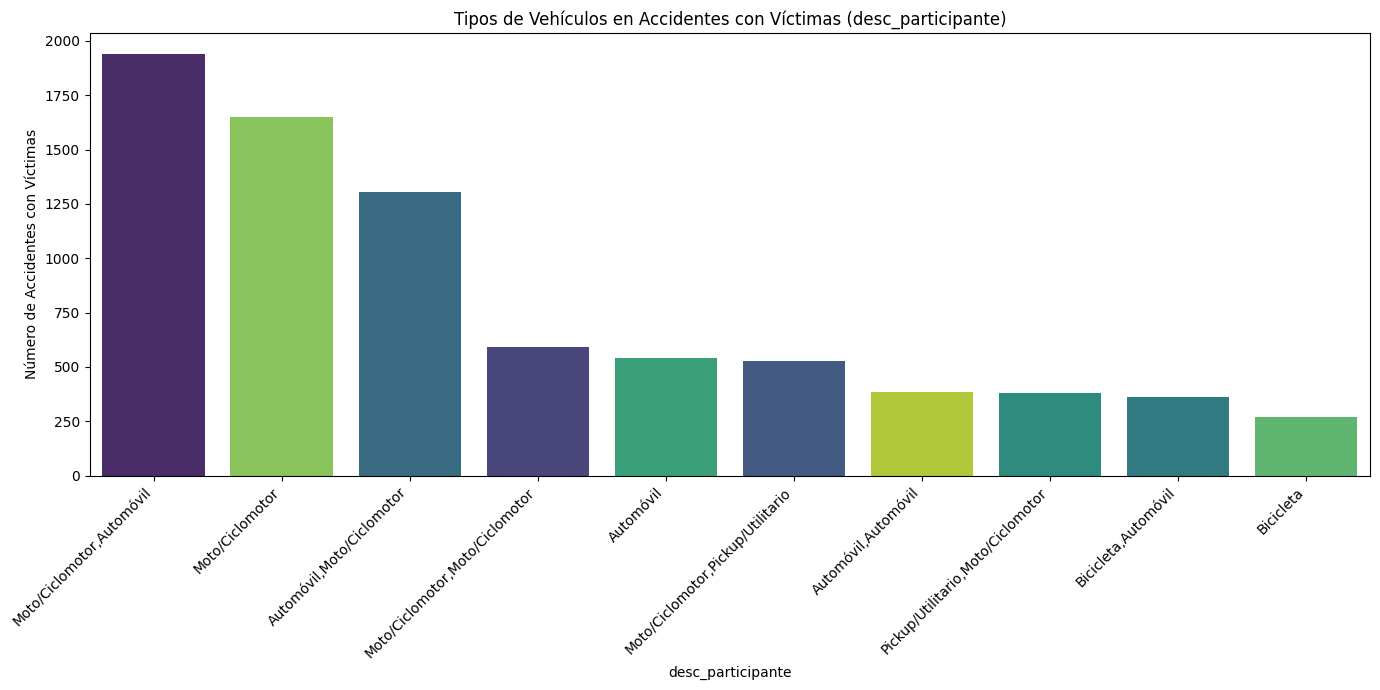

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

if df is not None:

    # --- Análisis Geográfico ---
    print("## Análisis Geográfico")
    # Asume que 'posicion_XY' es la columna con las coordenadas
    if 'posicion_XY' in df.columns:
        def extract_lat_lon(point_str):
            if isinstance(point_str, str) and point_str.startswith('POINT ('):
                coords = point_str[7:-1].split()
                if len(coords) == 2:
                    try:
                        return float(coords[1]), float(coords[0])
                    except ValueError:
                        return None, None
            return None, None

        df[['Latitude', 'Longitude']] = df['posicion_XY'].apply(lambda x: pd.Series(extract_lat_lon(x)))
        df_geo = df.dropna(subset=['Latitude', 'Longitude']).copy()

        if not df_geo.empty:
            print("Generando mapa de calor geográfico...")
            plt.figure(figsize=(10, 8))
            sns.kdeplot(data=df_geo, x='Longitude', y='Latitude', fill=True, cmap='Reds', levels=20)
            plt.title('Mapa de Calor de Siniestros Viales en Santa Fe')
            plt.xlabel('Longitud')
            plt.ylabel('Latitud')
            plt.show()

        else:
            print("No hay datos de geolocalización válidos para generar el mapa de calor.")
    else:
        print("❌ La columna 'posicion_XY' no se encontró. No se puede generar el mapa de calor.")

    # --- Análisis Temporal ---
    print("\n## Análisis Temporal")
    if 'Day_of_Week' in df.columns:
        print("Generando gráfico por día de la semana...")
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Day_of_Week', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='viridis', hue='Day_of_Week', legend=False)
        plt.title('Número de Accidentes por Día de la Semana')
        plt.xlabel('Día de la Semana')
        plt.ylabel('Número de Accidentes')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Columna 'Day_of_Week' no encontrada. No se puede generar el gráfico por día de la semana.")

    if 'Hour_of_Day' in df.columns:
        print("Generando gráfico por hora del día...")
        plt.figure(figsize=(12, 6))
        sns.countplot(data=df, x='Hour_of_Day', order=sorted(df['Hour_of_Day'].unique()), palette='viridis', hue='Hour_of_Day', legend=False)
        plt.title('Número de Accidentes por Hora del Día')
        plt.xlabel('Hora del Día')
        plt.ylabel('Número de Accidentes')
        plt.tight_layout()
        plt.show()
    else:
        print("❌ Columna 'Hour_of_Day' no encontrada. No se puede generar el gráfico por hora del día.")

    # --- Análisis por Tipo de Vehículo y Gravedad ---
    print("\n## Análisis por Tipo de Vehículo y Gravedad")
    severity_cols = ['heridos_leves', 'heridos_graves', 'heridos_gravisimos', 'fallecidos', 'sin_datos']
    vehicle_col = 'desc_participante'

    if vehicle_col in df.columns and all(col in df.columns for col in severity_cols):
        print(f"Conteo de accidentes por {vehicle_col}:")
        display(df[vehicle_col].value_counts().head(10))

        df['Gravedad_Total'] = df[severity_cols].sum(axis=1)

        print("Generando gráfico de gravedad promedio por tipo de vehículo...")
        plt.figure(figsize=(14, 7))
        top_vehicles = df[vehicle_col].value_counts().head(10).index
        df_filtered = df[df[vehicle_col].isin(top_vehicles)].copy()
        sns.barplot(data=df_filtered, x=vehicle_col, y='Gravedad_Total', palette='viridis', hue=vehicle_col, legend=False)
        plt.title(f'Gravedad Promedio de Accidentes por {vehicle_col}')
        plt.xlabel(vehicle_col)
        plt.ylabel('Gravedad Promedio (Suma de Heridos y Fallecidos)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

        print("Generando gráfico de tipos de vehículos en accidentes con víctimas...")
        df_victims = df_filtered[df_filtered['Gravedad_Total'] > 0].copy()
        if not df_victims.empty:
            plt.figure(figsize=(14, 7))
            sns.countplot(data=df_victims, x=vehicle_col, palette='viridis', order=df_victims[vehicle_col].value_counts().index, hue=vehicle_col, legend=False)
            plt.title(f'Tipos de Vehículos en Accidentes con Víctimas ({vehicle_col})')
            plt.xlabel(vehicle_col)
            plt.ylabel('Número de Accidentes con Víctimas')
            plt.xticks(rotation=45, ha='right')
            plt.tight_layout()
            plt.show()
        else:
            print("No hay accidentes con víctimas para graficar.")

    else:
        missing_cols = [col for col in severity_cols + [vehicle_col] if col not in df.columns]
        print(f"❌ Faltan las siguientes columnas para el análisis de tipo de vehículo y gravedad: {missing_cols}. No se pueden generar los gráficos.")

else:
    print("❌ No se pudo cargar el DataFrame. No se realizará el análisis y visualización finales.")